In [3]:
import random, math
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def sample_from_distribution(mu):
    val = random.random()
    return mu * val + (1-val) * (1-mu)  

def exp3_which_arm(arm1, arm2, eta):
    exp1= math.exp(np.sum(eta*arm1))
    exp2= math.exp(np.sum(eta*arm2))
    if exp1 < exp2:
        return 1
    else: 
        return 2

In [28]:
def EXP3_regret(mu1, mu2, total_time, arm_num, eta):
    total_best_reward = 0
    total_reward = 0
    exp3_regret = np.zeros((total_time, arm_num))
    regret = np.zeros(total_time)
    iterations = [0] * total_time
    best_mu = max(mu1, mu2)

    for t in range(total_time):
        sample1 = sample_from_distribution(mu1)
        sample2 = sample_from_distribution(mu2)
        if exp3_which_arm(exp3_regret[:, 0], exp3_regret[:, 1], eta) == 1:
            new_sample = sample1
            exp3_regret[t, 0] = new_sample
            exp3_regret[t, 1] = 0
        else: 
            new_sample = sample2
            exp3_regret[t, 0] = 0
            exp3_regret[t, 1] = new_sample
    
        total_best_reward += sample2
        total_reward += new_sample
        regret[t] = total_best_reward - total_reward
        iterations[t] = t
    
    return regret, iterations

def UCB_regret(mu1, mu2, total_time, arm_num, eta):
    ucb_regret = np.zeros(total_time)
    iterations = [0] * total_time

    mu1_cur = 0
    mu2_cur = 0
    t1_cur = 0
    t2_cur = 0
    total_reward = 0
    total_best_reward = 0
    mu1_cur = sample_from_distribution(mu1)
    mu2_cur = sample_from_distribution(mu2)
    t1_cur = 1
    t2_cur = 1

    for t in range(total_time):
        mu1_ucb = mu1_cur + math.sqrt(alpha * math.log(t+1) * 1.0 / (2 * t1_cur))
        mu2_ucb = mu2_cur + math.sqrt(alpha * math.log(t+1) * 1.0 / (2 * t2_cur))
        if mu1_ucb > mu2_ucb:
            new_sample = sample_from_distribution(mu1)
            mu1_cur = (t1_cur * mu1_cur + new_sample) * 1.0 / (t1_cur + 1)
            t1_cur += 1
            total_best_reward += new_sample
        else:
            new_sample = sample_from_distribution(mu2)
            mu2_cur = (t2_cur * mu2_cur + new_sample) * 1.0 / (t2_cur + 1)
            t2_cur += 1
            total_best_reward += sample_from_distribution(mu1)

        total_reward += new_sample
        ucb_regret[t] = total_best_reward - (total_reward * 1.0)
        iterations[t] = t

    return ucb_regret, iterations


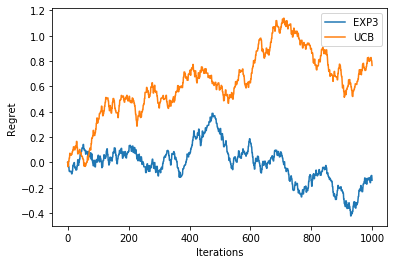

In [30]:
mu1 = 0.5
mu2 = 0.55

total_time = 1000
arm_num = 2
eta = math.sqrt(2*math.log(arm_num)/(total_time*arm_num))  

exp3_regret, iterations = EXP3_regret(mu1, mu2, total_time, arm_num, eta)

ucb_regret , iterations = UCB_regret(mu1, mu2, total_time, arm_num, eta)

plt.errorbar(iterations, exp3_regret, label='EXP3')
plt.errorbar(iterations, ucb_regret,  label='UCB')
plt.xlabel('Iterations')
plt.ylabel('Regret')
plt.legend()
plt.show()



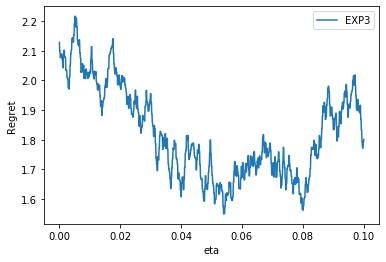

In [58]:
mu1 = 0.5
mu2 = 0.55
total_time = 10000
arm_num = 2
total_best_reward = 0
total_reward = 0
exp3_regret = np.zeros((total_time, arm_num))
regret = np.zeros(total_time)
iterations = [0] * total_time
eta = math.sqrt(2*math.log(arm_num)/(total_time*arm_num))  



for t in range(total_time):
    sample1 = sample_from_distribution(mu1)
    sample2 = sample_from_distribution(mu2)
    if exp3_which_arm(exp3_regret[:, 0], exp3_regret[:, 1], eta) == 1:
        new_sample = sample1
        exp3_regret[t, 0] = new_sample
        exp3_regret[t, 1] = 0
    else: 
        new_sample = sample2
        exp3_regret[t, 0] = 0
        exp3_regret[t, 1] = new_sample
    
    total_best_reward += sample2
    total_reward += new_sample
    regret[t] = total_best_reward - total_reward
    iterations[t] = t

new_regret = [] 
eta_vec = []
eta = 0
while eta <= 0.1:
    sample1 = sample_from_distribution(mu1)
    sample2 = sample_from_distribution(mu2)
    if exp3_which_arm(exp3_regret[:, 0], exp3_regret[:, 1], eta) == 1:
        new_sample = sample1
        exp3_regret[t, 0] = new_sample
        exp3_regret[t, 1] = 0
    else: 
        new_sample = sample2
        exp3_regret[t, 0] = 0
        exp3_regret[t, 1] = new_sample
    
    total_best_reward = sample2 + total_best_reward
    total_reward = new_sample + total_reward
    new_regret.append(total_best_reward - total_reward)
    eta += 0.0001
    eta_vec.append(eta)
plt.errorbar(eta_vec, new_regret,  label='EXP3')
plt.xlabel('eta')
plt.ylabel('Regret')
plt.legend()
plt.show()